In [1]:
from datetime import datetime
import gym
from gym.wrappers import Monitor
import gym_ple
import matplotlib.pyplot as plt

%load_ext autoreload

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
# Create a random agent
class RandomAgent(object):
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

In [3]:
from utils import generate_gif

env = gym.make('FlappyBird-v0')

print("Action space is: {}".format(env.action_space))

agent = RandomAgent(env.action_space)

episode_count = 1
reward = 0
done = False

samples = []
frames_for_gif = []

for i in range(episode_count):
    ob = env.reset()
    frames_for_gif.append(ob)
    episode_reward = 0
    
    while True:
        action = agent.act(ob, reward, done)
        ob, reward, done, info = env.step(action)
        frames_for_gif.append(ob)
        samples.append(ob)
        episode_reward += reward
        if done:
            print("Finished episode {}. Episode reward: {}". format(i+1, episode_reward))
            break
            

env.close()
generate_gif(frames_for_gif, 1, episode_reward, './vid/')


WARN: Environment '<class 'gym_ple.ple_env.PLEEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
Action space is: Discrete(2)
Finished episode 1. Episode reward: -5.0


In [4]:
import glob, io, base64
from IPython.display import HTML
import random

# obtain all videos 
videos = [v for v in glob.glob("vid/*.mp4")]

#display random episode
video_path = random.choice(videos)
video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [5]:
obs = env.reset()
print(obs.shape)

(512, 288, 3)


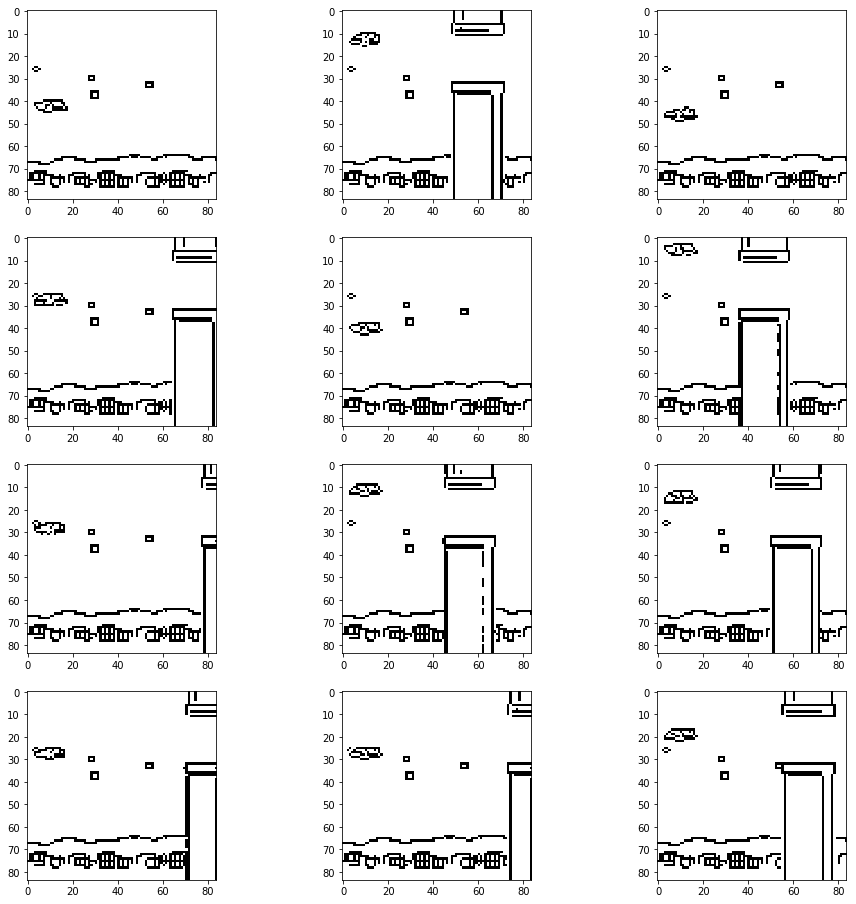

In [8]:
from image_transformer import ImageTransformer
import tensorflow as tf
import random


transformer = ImageTransformer(crop_boundaries=(0, 50, 400, 238))
sess = tf.Session()
images = [transformer.transform(s, sess) for s in random.sample(samples, 12)]
# images = [s for s in random.sample(samples, 12)]
fig = plt.figure(figsize=(16, 16))
rows = 4
for i, img in enumerate(images):
    fig.add_subplot(rows, 3, i + 1)
    plt.imshow(img, cmap='gray')
# plt.imshow(masked, cmap='gray')

